In [ ]:
# library
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy

This file provide simple extraction and visualization of the raw data.
Just want to make sure that everything is correctly loaded!

In [ ]:
def load_semg_data(data_folder):
    """
    Load sEMG data into a layered dictionary.
    Structure: {subject_name: {gesture_name: semg_array, ...}, ...}
    """
    semg_data = {}
    
    for subject in os.listdir(data_folder):
        subject_path = os.path.join(data_folder, subject)
        if os.path.isdir(subject_path) and subject.startswith('HS'): # for now, only HS subjects
            semg_data[subject] = {}
            
            # each .mat file (gesture)
            for filename in os.listdir(subject_path):
                if filename.endswith('.mat'):
                    gesture_name = os.path.splitext(filename)[0]  # Remove .mat extension
                    file_path = os.path.join(subject_path, filename)
                    mat_contents = scipy.io.loadmat(file_path)
                    
                    # Each .mat file is assumed to have only one variable (ignore __header__, __version__, __globals__)
                    for key in mat_contents:
                        if not key.startswith('__'):
                            semg_array = mat_contents[key]
                            break
                            
                    # Store the sEMG data under the gesture name for the subject
                    semg_data[subject][gesture_name] = semg_array
                    
    return semg_data

# Example usage:
data_folder_path = 'Data' 
data_structure = load_semg_data(data_folder_path)

print(data_structure.keys())  # list all subject folder names


dict_keys(['HS1', 'HS2', 'HS3', 'HS4', 'HS5', 'HS6', 'HS7', 'HS8'])


Selected Subject: HS1
Available Gestures: ['closehand', 'MVC', 'openhand', 'pointer', 'thumb_ext', 'thumb_flex', 'wrist_ext', 'wrist_flex']
Selected Gesture: closehand
Shape of sEMG Data (Channels x Time Steps): (64, 135633)
(64,) (64,) (64,)
[ 6.21591211e+03  5.34106299e+03 -3.98441406e+03  1.35492734e+04
  1.14814473e+04 -5.90797119e+02  9.70326270e+03 -3.94922240e+07
  8.11894580e+03 -3.92023315e+03 -2.73565967e+03  7.16547949e+03
 -4.03305566e+03  7.74770691e+02  2.63881787e+03  3.31286646e+03
  5.12216675e+02  3.79685449e+03  8.37033691e+03  9.30539551e+03
 -4.73836719e+03  6.51528271e+03 -3.08251343e+03  5.96556885e+03
 -8.33116602e+03 -2.60382178e+03  6.01088184e+03 -7.96233643e+03
 -5.57294238e+03  4.90794141e+03  1.10619707e+04  5.65775684e+03
  7.19920703e+03 -8.67921582e+03 -1.54712861e+04 -1.50884619e+04
 -6.51695605e+03 -5.10287549e+03 -1.96061304e+03  3.26836279e+03
 -2.37304565e+02 -5.46789856e+02 -7.35656982e+03 -6.76314307e+03
 -5.61970801e+03 -7.87261182e+03 -6.864361

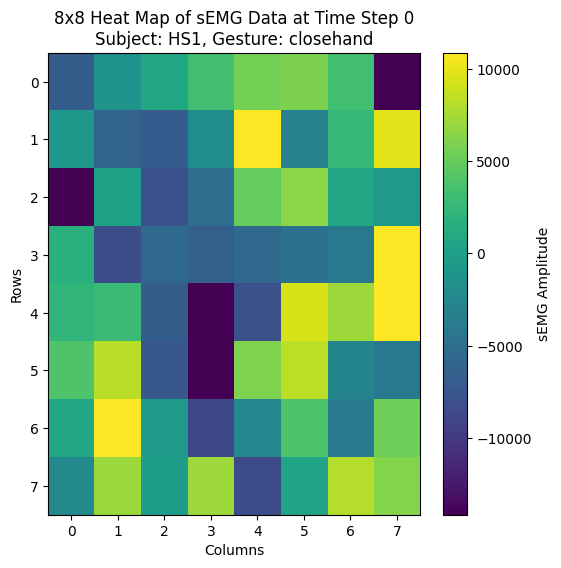

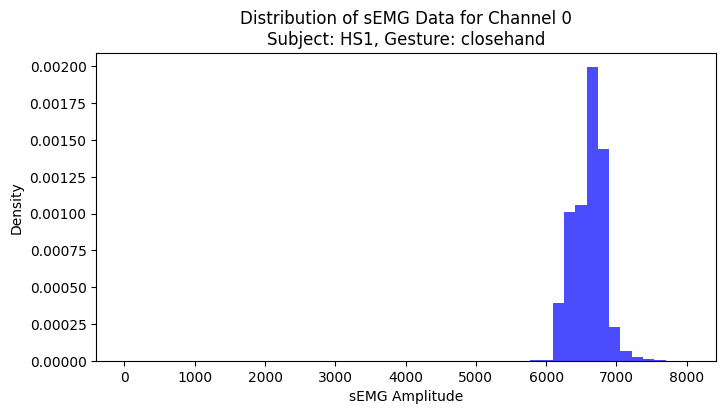

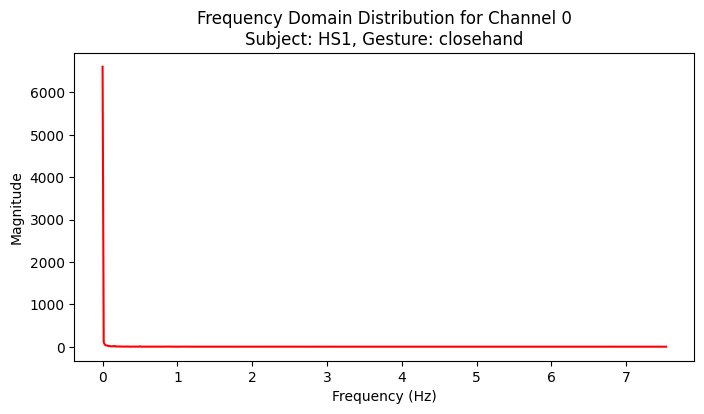

In [ ]:
#### check if data are retrieved correctly
# Select a subject and gesture for demonstration
subject_names = list(data_structure.keys())
selected_subject = subject_names[0]

# Get the list of gesture names for the selected subject
gesture_names = list(data_structure[selected_subject].keys())
selected_gesture = gesture_names[0]

# Retrieve the sEMG data for the selected subject and gesture
semg_data = data_structure[selected_subject][selected_gesture]

# Print details about the subject and its sEMG data
print("Selected Subject:", selected_subject)
print("Available Gestures:", gesture_names)
print("Selected Gesture:", selected_gesture)
print("Shape of sEMG Data (Channels x Time Steps):", semg_data.shape)

# Select a specific time step
time_step = 0
selected_time_data = semg_data[:, time_step]

# map the index order to actual 8x8 matrix
indices = np.arange(64)
rows = 7 - (indices % 8)
cols = 7 - (indices // 8)
print(selected_time_data.shape, rows.shape, cols.shape)

# Create an empty 8x8 matrix and assign sensor values using vectorized indexing
heatmap_matrix = np.zeros((8, 8))
heatmap_matrix[rows, cols] = selected_time_data
print(selected_time_data)
print(heatmap_matrix)
# the max and min values seems to be too large
vmin = np.percentile(heatmap_matrix, 5)
vmax = np.percentile(heatmap_matrix, 95)

plt.figure(figsize=(6, 6))
plt.imshow(heatmap_matrix, aspect='auto', cmap='viridis', vmin=vmin, vmax=vmax)
plt.colorbar(label='sEMG Amplitude')
plt.title(f"8x8 Heat Map of sEMG Data at Time Step {time_step}\nSubject: {selected_subject}, Gesture: {selected_gesture}")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()



#### Plot Distribution for a Selected Channel
# the current selected channel is 0, but this channel does not show significant change during the gesture of "close hand"
# Select one channel for distribution analysis (e.g., channel 0)
selected_channel = 0
channel_data = semg_data[selected_channel, :]

plt.figure(figsize=(8, 4))
plt.hist(channel_data, bins=50, density=True, alpha=0.7, color='blue')
plt.xlabel("sEMG Amplitude")
plt.ylabel("Density")
plt.title(f"Distribution of sEMG Data for Channel {selected_channel}\nSubject: {selected_subject}, Gesture: {selected_gesture}")
plt.show()


#### 4. Plot Frequency Domain Distribution for the Selected Channel
fs = 2048  # Sampling frequency in Hz  
N = len(channel_data)

# Compute FFT and corresponding frequency bins
fft_vals = np.fft.fft(channel_data)
fft_freq = np.fft.fftfreq(N, d=1/fs)

# Use only the positive frequencies
mask = fft_freq >= 0
fft_freq = fft_freq[mask]
fft_magnitude = np.abs(fft_vals[mask]) / N  # normalize by the number of samples

plt.figure(figsize=(8, 4))
plt.plot(fft_freq[:500], fft_magnitude[0:500], color='red')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title(f"Frequency Domain Distribution for Channel {selected_channel}\nSubject: {selected_subject}, Gesture: {selected_gesture}")
plt.show()